# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [50]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler


data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [51]:
from sklearn.cluster import KMeans
%pip

kmeans = KMeans(n_clusters=8)
model = kmeans.fit(X)

from sklearn.metrics import silhouette_score
y_pred = model.labels_


silhouette_score(X, y_pred)


Usage:   
  c:\Users\cleme\anaconda3\python.exe -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  

c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5398971441034116

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [52]:
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(X)

y_pred = model.labels_


silhouette_score(X, y_pred)

c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [53]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X)

y_pred = model.labels_

silhouette_score(X, y_pred)

c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5711381937868837

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

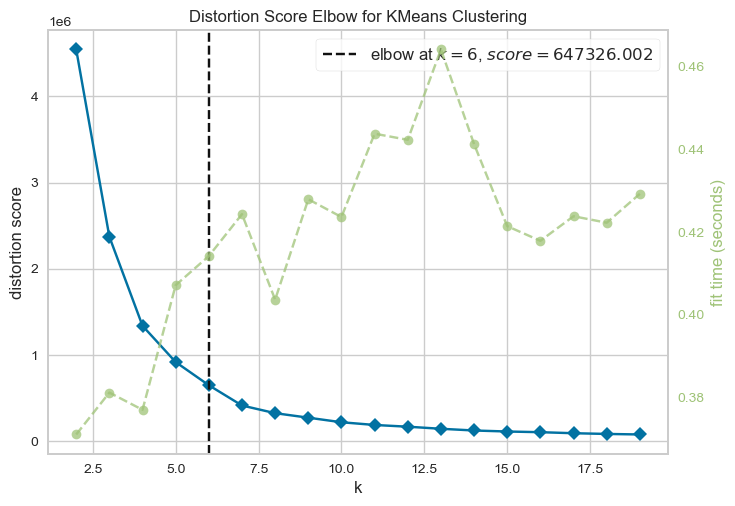

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)

# Crear el codo
visualizer = KElbowVisualizer(kmeans, k=(2, 20), metric='distortion')

# Adaptar los datos al visualizador
visualizer.fit(X)

# Elbow curve
visualizer.show()


## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

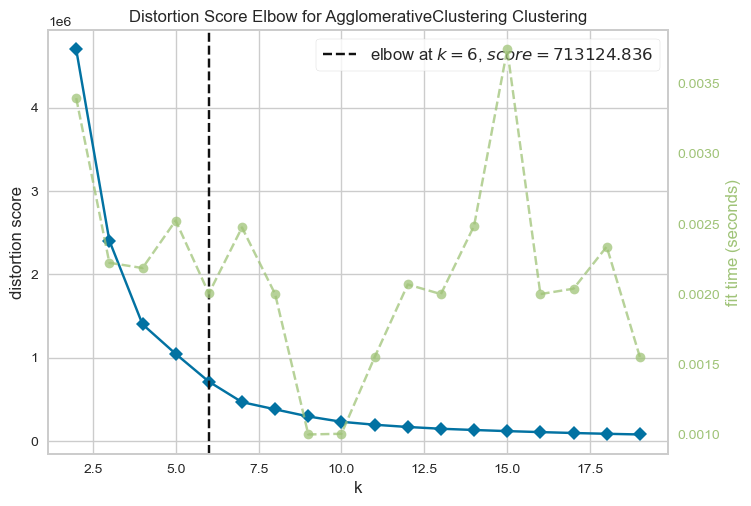

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:

from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

agg_clustering = AgglomerativeClustering()

# Crear el codo
visualizer = KElbowVisualizer(agg_clustering, k=(2, 20), metric='distortion')

# adaptar los datos al visualizador
visualizer.fit(X)

# elbow curve
visualizer.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cleme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


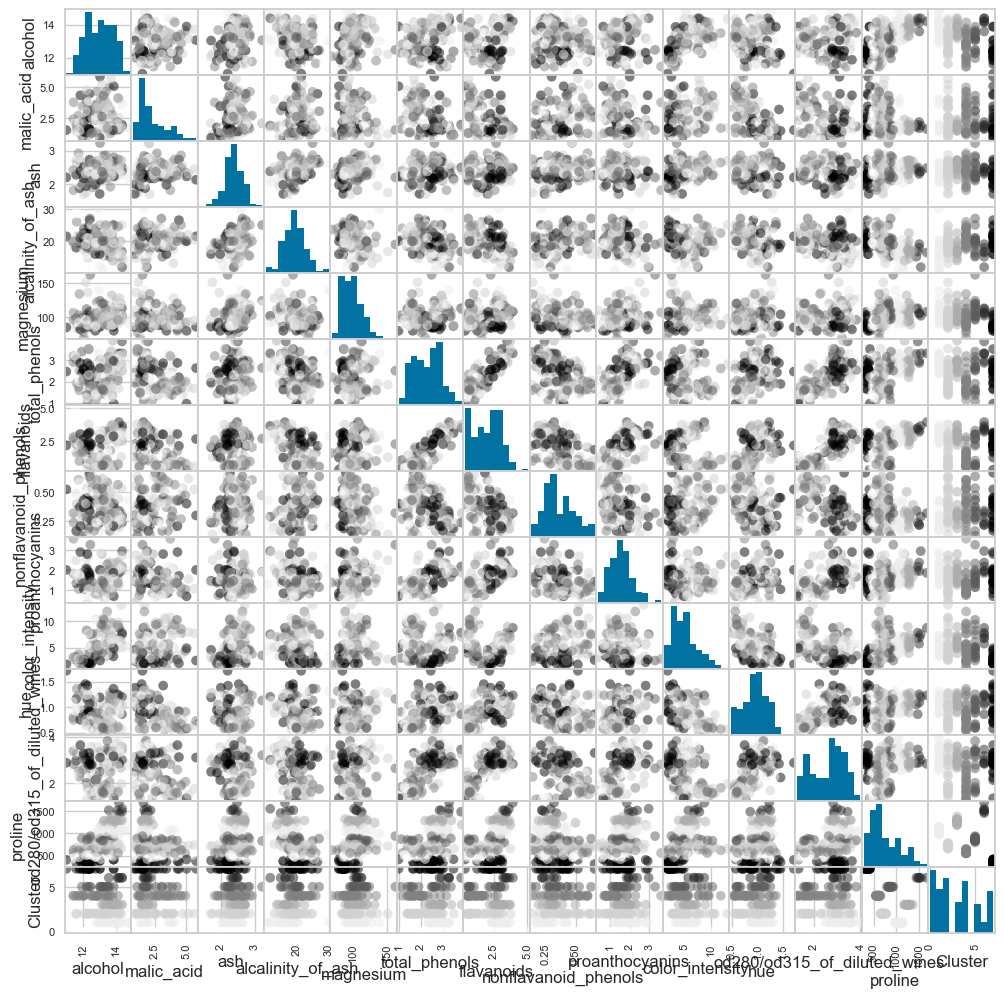

In [56]:


# Cual es el modelo de clustering con mejor rendimiento (por ejemplo, KMeans o AgglomerativeClustering)
mejor_modelo = KMeans(n_clusters=8, random_state=42)

# Ajustar el modelo a los datos
mejor_modelo.fit(X)

# Agregar las etiquetas de cluster al conjunto de datos original
X_con_clusters = X.copy()
X_con_clusters['Cluster'] = mejor_modelo.labels_

# Crear la matriz de dispersión
matriz_dispersión = pd.plotting.scatter_matrix(X_con_clusters, c=X_con_clusters['Cluster'], figsize=(12, 12), marker='o', hist_kwds={'bins': 10})

plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

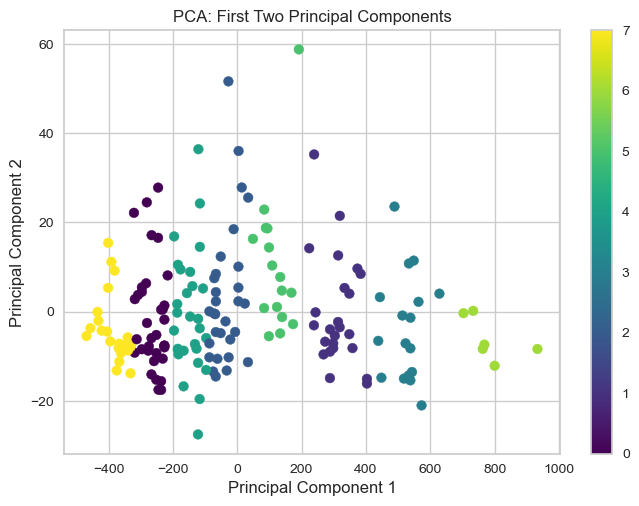

In [57]:
from sklearn.decomposition import PCA


#  PCA model
pca = PCA(n_components=2)

# Aplicar PCA a los datos
pca_result = pca.fit_transform(X)

# Crear scatter plotter a los dos primeros componenentes
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=best_model.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')

# Barra de color
plt.colorbar()

# plot
plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

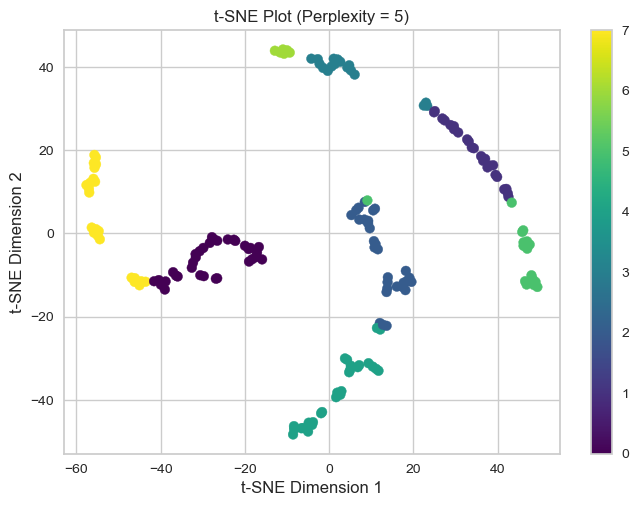

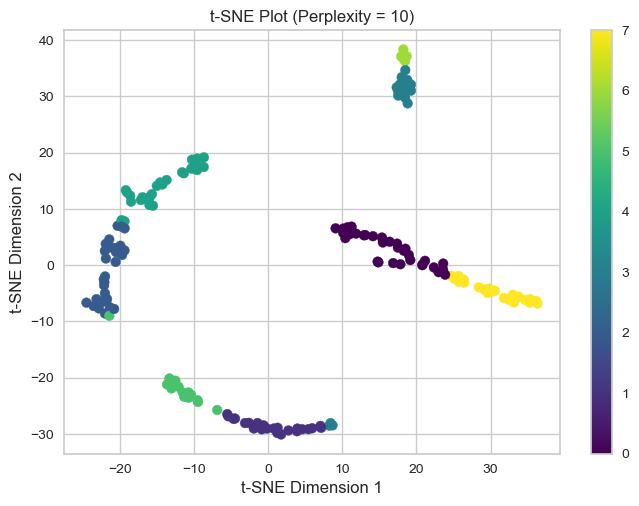

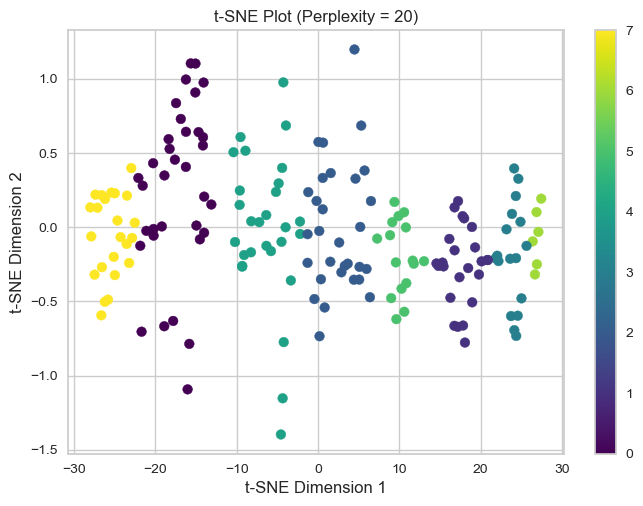

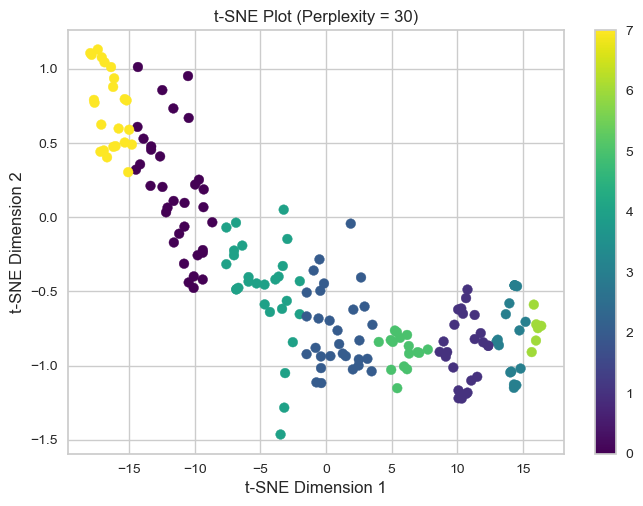

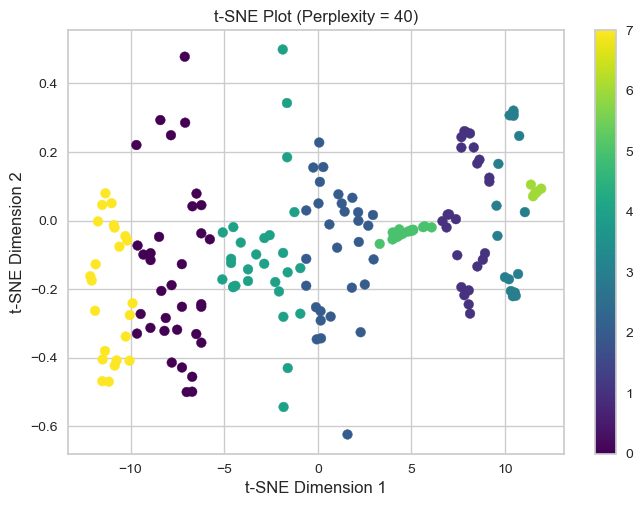

In [58]:
from sklearn.manifold import TSNE


# perplexity valores para tsne
perplexities = [5, 10, 20, 30, 40]

# tsne plots para cada perplexity
for perplexity in perplexities:
    # Instantiate t-SNE model
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    
    # Aplicar tsne a los datos
    tsne_result = tsne.fit_transform(X)
    
    # Crear un scatter plot con color
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=best_model.labels_, cmap='viridis')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title(f't-SNE Plot (Perplexity = {perplexity})')
    plt.colorbar()
    
    # plot
    plt.show()
